# Input

In [ ]:
# Enter desired resolution of mesh in metres.
# Room size is 4m x 3m. A mesh resolution of 0.1m is recommended.
dx = 0.1

# Save output grid data as csv? Output will be saved as output.csv in same folder.
savecsv = False

# Where are the data files located?
datalocation = "../Case 0/Plane Output/"

# Output time
time = 600.0

# Scroll down to view interpolated data and other output.

# Header Files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import CFD Data

In [ ]:
filename = datalocation + 'planeoutput-' + str(int(time*10))
table = pd.read_csv(filename, delimiter=',')
array = np.array(table)
count = 0
print('Array has the following variables.')
for name in table.columns:
    print(count, name)
    count+=1

In [ ]:
fig,ax = plt.subplots(1,1,num=1,figsize=(6,4),dpi=150)
ax.scatter(array[:,1],array[:,3],s=2,c=array[:,13],cmap='viridis')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_title('Raw CFD data before interpolation')

# Interpolation

<u><b>Cubic</b></u> interpolation scheme used for all variables.

In [ ]:
m = 4.0 + 1e-10
n = 3.0 + 1e-10
x = array[:,1]
z = array[:,3]
xvelocity = array[:,8]
yvelocity = array[:,9]
zvelocity = array[:,10]
temperature = array[:,11]
dpm_concentration = array[:,13]
prob_infection = array[:,20]

grid_x, grid_z = np.mgrid[dx/2:m-dx/2:dx, dx/2:n-dx/2:dx]

grid_u = griddata((x, z), xvelocity, (grid_x, grid_z), method='cubic')
grid_v = griddata((x, z), yvelocity, (grid_x, grid_z), method='cubic')
grid_w = griddata((x, z), zvelocity, (grid_x, grid_z), method='cubic')
grid_t = griddata((x, z), temperature, (grid_x, grid_z), method='cubic')
grid_d = griddata((x, z), dpm_concentration, (grid_x, grid_z), method='cubic')
grid_p = griddata((x, z), prob_infection, (grid_x, grid_z), method='cubic')

grid_u[np.isnan(grid_u)] = 0
grid_v[np.isnan(grid_v)] = 0
grid_w[np.isnan(grid_w)] = 0
grid_t[np.isnan(grid_t)] = 294
grid_d[np.isnan(grid_d)] = 0
grid_p[np.isnan(grid_p)] = 0

# Output plots

In [ ]:
xcoord = grid_x.flatten()
ycoord = np.ones(xcoord.size)*1.5
zcoord = grid_z.flatten()
x_vel = grid_u.flatten()
y_vel = grid_v.flatten()
z_vel = grid_w.flatten()
ttemp = grid_t.flatten()
dpm_c = grid_d.flatten()
probi = grid_p.flatten()

In [ ]:
fig,ax = plt.subplots(1,1,num=1,figsize=(6,4),dpi=150)
ax.scatter(xcoord,zcoord,s=5,c=dpm_c,cmap='viridis')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_title('CFD data after interpolation')

In [ ]:
fig,axs = plt.subplots(2,3,figsize = (18,9), dpi=150)

axs = axs.flatten()

im1 = axs[0].imshow(grid_u.T,extent=[0,m,0,n])
axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Z [m]')
axs[0].set_title('X - Velocity [m/s]')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

im2 = axs[1].imshow(grid_v.T,extent=[0,m,0,n])
axs[1].set_xlabel('X [m]')
axs[1].set_ylabel('Z [m]')
axs[1].set_title('Y - Velocity [m/s]')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax)

im3 = axs[2].imshow(grid_w.T,extent=[0,m,0,n])
axs[2].set_xlabel('X [m]')
axs[2].set_ylabel('Z [m]')
axs[2].set_title('Z - Velocity [m/s]')
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im3, cax=cax)

im4 = axs[3].imshow(grid_t.T,extent=[0,m,0,n])
axs[3].set_xlabel('X [m]')
axs[3].set_ylabel('Z [m]')
axs[3].set_title('Temperature [K]')
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im4, cax=cax)

im5 = axs[4].imshow(grid_d.T,extent=[0,m,0,n])
axs[4].set_xlabel('X [m]')
axs[4].set_ylabel('Z [m]')
axs[4].set_title('DPM Concentration [kg/m^3]')
divider = make_axes_locatable(axs[4])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im5, cax=cax)

im6 = axs[5].imshow(grid_p.T,extent=[0,m,0,n])
axs[5].set_xlabel('X [m]')
axs[5].set_ylabel('Z [m]')
axs[5].set_title('Probability of Infection [%]')
divider = make_axes_locatable(axs[5])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im6, cax=cax)

plt.suptitle('t=%.2f s' %time, fontsize = 20)
plt.tight_layout()

In [ ]:
# Individual plots. 
# Change "grid_vel" to "grid_u", "grid_v", "grid_w" to visualize individually.

fig = plt.figure(figsize=(6,4),dpi=150)
ax = plt.gca()
im = plt.imshow(grid_d.T,extent=[0,m,0,n])
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.title('DPM Concentration [kg/m^3]')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)
plt.colorbar(im, cax=cax)
plt.show()

# Histogram of sampled particles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

filename_left = '../../Case2/Virions Inhaled Sampling/susceptible_nostril_left.dpm'
filename_right = '../../Case2/Virions Inhaled Sampling/susceptible_nostril_right.dpm'

['(susceptible_nostril_left', '13)']
['(', 'x', 'y', 'z', 'u', 'v', 'w', 'diameter', 't', 'parcel-mass', 'mass', 'n-in-parcel', 'time', 'flow-time)']
[5.23598776e-16 5.23598776e-16 5.23598776e-16 ... 5.23598776e-19
 5.23598776e-19 5.23598776e-19]


Text(0.5, 1.0, 'Case 1 \n Probability of Infection vs. Time')

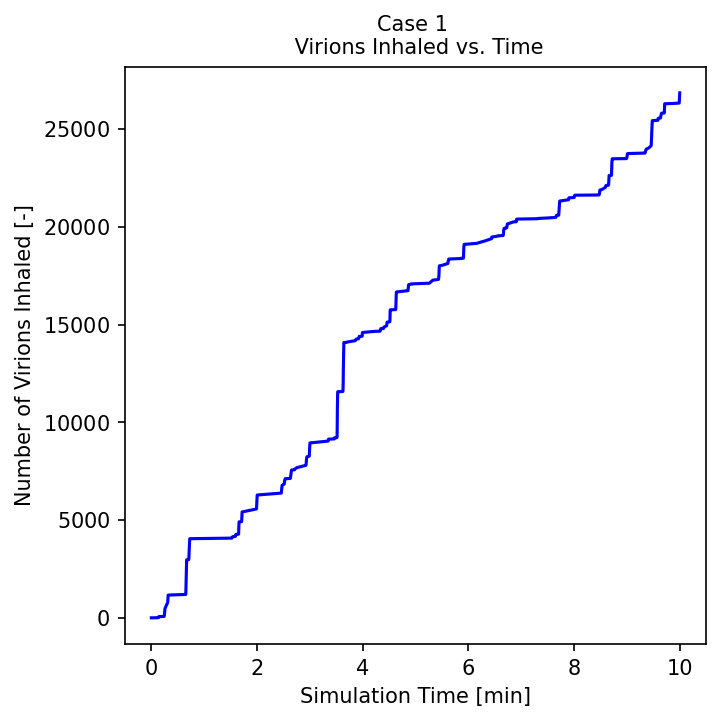

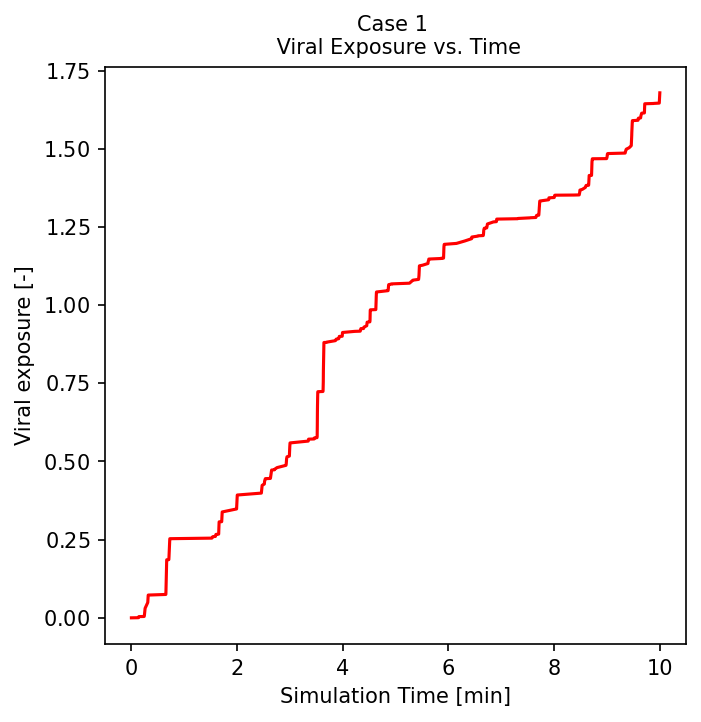

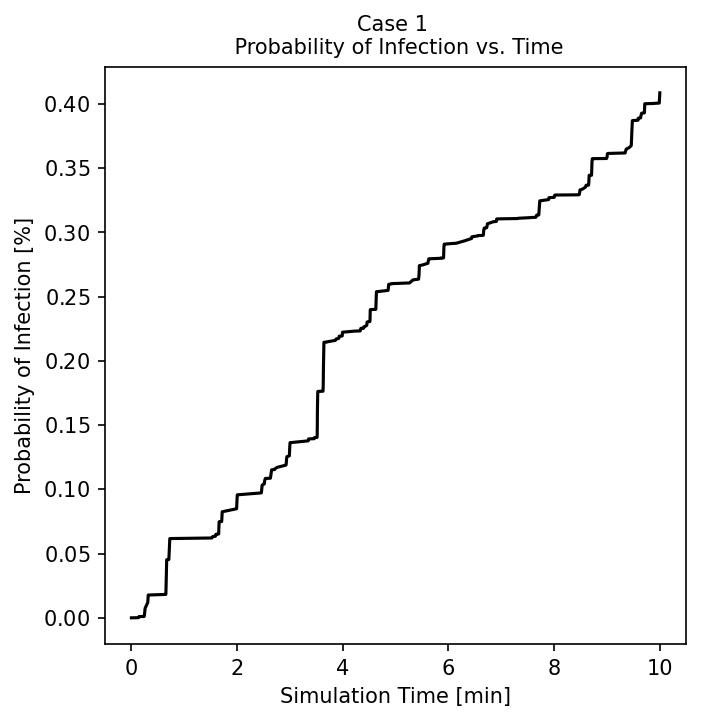

In [2]:
file = open(filename_left,'r')
count = 0
index = 0
twocollist = []
for lines in file:

  count+=1

  if count>2: 

    twocollist.append([index,float(lines.split()[7]),float(lines.split()[13][:-1])])
    index+=1
  
  else:

    print(lines.split())

file.close()

del file, count, lines

file = open(filename_right, 'r')
count = 0
for lines in file:

  count+=1

  if count>2: 

    twocollist.append([index,float(lines.split()[7]),float(lines.split()[13][:-1])])
    index+=1

file.close()

del file, count, lines

twocollist = np.array(twocollist)
twocollist = twocollist[twocollist[:, 2].argsort()]
for i in range(len(twocollist)):
    twocollist[i,0] = i

diamlist = twocollist[:,1]
time = twocollist[:,2]
volumelist = np.pi/6*np.power(diamlist,3)
print(volumelist)

time = np.insert(time,0,0)
time = time/60

volumelist = np.insert(volumelist,0,0)
counts = []

val = 0
sum = 0
for i in range(len(time)):
  sum+=volumelist[i]
  counts.append(sum)
  val+=1

cv = 7000000000 #billion/liter
cv = cv*1000 #in m3

N = cv*np.array(counts)
d = N/16000

k = 410
power = -1/k * d
P = 1 - np.exp(power)

plotx = []
ploty1 = []
ploty2 = []
ploty3 = []

for i in range(int(len(time)/1000)):
  plotx.append(time[i*1000])
  ploty1.append(N[i*1000])
  ploty2.append(d[i*1000])
  ploty3.append(P[i*1000]*100)

fig,ax = plt.subplots(num=2, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty1,'b',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Number of Virions Inhaled [-]')
plt.title('Case 1 \n Virions Inhaled vs. Time', fontsize=10)
# plt.savefig('../Case 0/Virions Inhaled Sampling/nvirions.jpg')

fig,ax = plt.subplots(num=3, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty2,'r',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Viral exposure [-]')
plt.title('Case 1 \n Viral Exposure vs. Time', fontsize=10)
# plt.savefig('../Case 0/Virions Inhaled Sampling/exposure.jpg')

fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty3,'k',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Probability of Infection [%]')
plt.title('Case 1 \n Probability of Infection vs. Time', fontsize=10)
# plt.savefig('../Case 0/Virions Inhaled Sampling/prob.jpg')

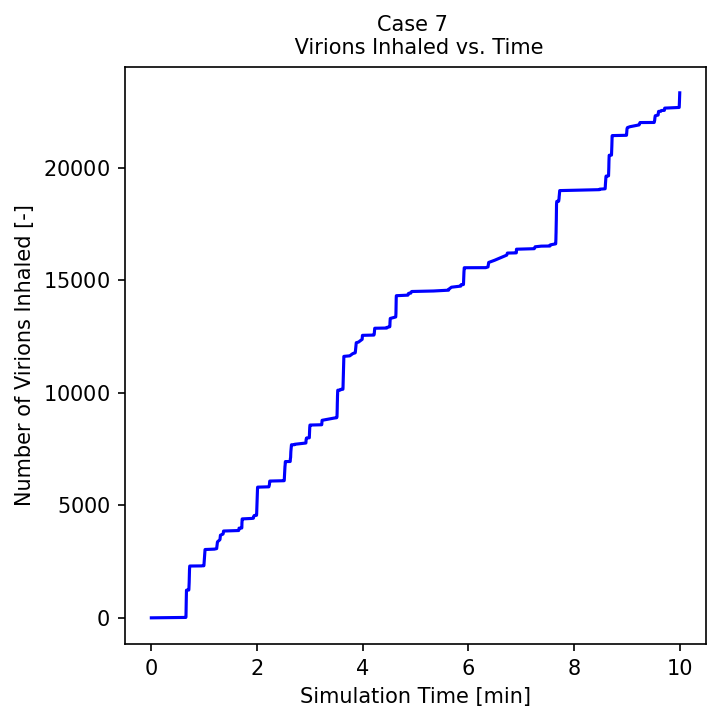

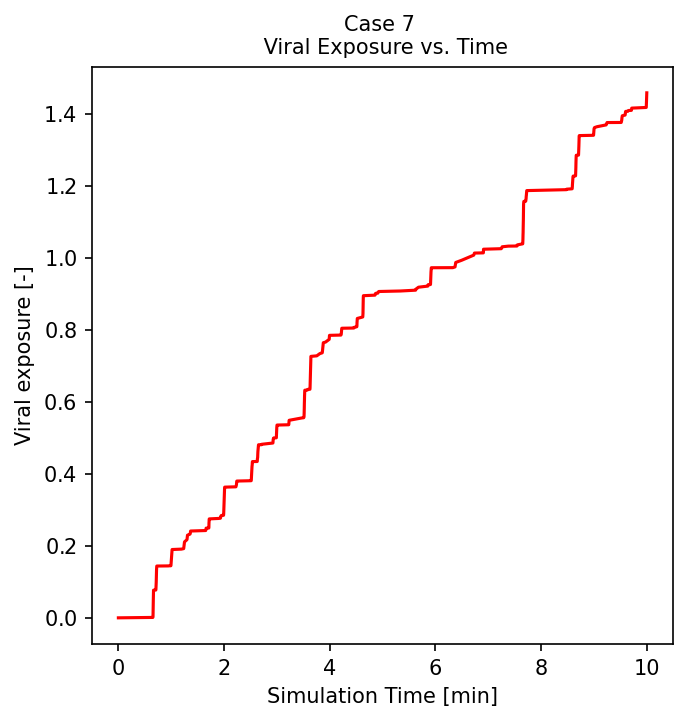

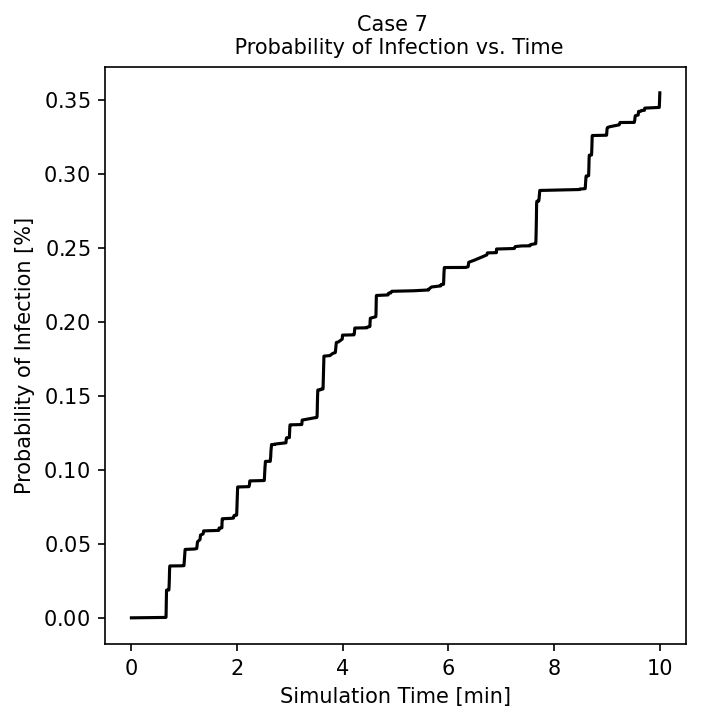

In [5]:
fig,ax = plt.subplots(num=2, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty1,'b',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Number of Virions Inhaled [-]')
plt.title('Case 7 \n Virions Inhaled vs. Time', fontsize=10)
plt.savefig('../../Case7/Virions Inhaled Sampling/nvirions.jpg')

fig,ax = plt.subplots(num=3, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty2,'r',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Viral exposure [-]')
plt.title('Case 7 \n Viral Exposure vs. Time', fontsize=10)
plt.savefig('../../Case7/Virions Inhaled Sampling/exposure.jpg')

fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(plotx,ploty3,'k',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Probability of Infection [%]')
plt.title('Case 7 \n Probability of Infection vs. Time', fontsize=10)
plt.savefig('../../Case7/Virions Inhaled Sampling/prob.jpg')

In [3]:
# diamarray=[3e-05, 5e-05, 1e-05, 1e-06, 0.0001, 3e-6]
diamarray=[1e-6,1e-5,3e-5,5e-5,1e-4]
dia1 = []
dia2 = []
dia3 = []
dia4 = []
dia5 = []
# dia6 = []
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
# count6 = 0

for i in range(len(time)-1):
    if diamlist[i]==diamarray[0]:
        dia1.append(time[i])
    if diamlist[i]==diamarray[1]:
        dia2.append(time[i])
    if diamlist[i]==diamarray[2]:
        dia3.append(time[i])
    if diamlist[i]==diamarray[3]:
        dia4.append(time[i])
    if diamlist[i]==diamarray[4]:
        dia5.append(time[i])
    # if diamlist[i]==diamarray[5]:
    #     dia6.append(time[i])

In [4]:
masslist = [1.2*np.pi*(i**3)/6 for i in diamarray]
weight1 = masslist[0]*np.ones_like(dia1)
weight2 = masslist[1]*np.ones_like(dia2)
weight3 = masslist[2]*np.ones_like(dia3)
weight4 = masslist[3]*np.ones_like(dia4)
weight5 = masslist[4]*np.ones_like(dia5)

Text(0.5, 1.0, 'Case 1 \n Histogram of droplets inhaled')

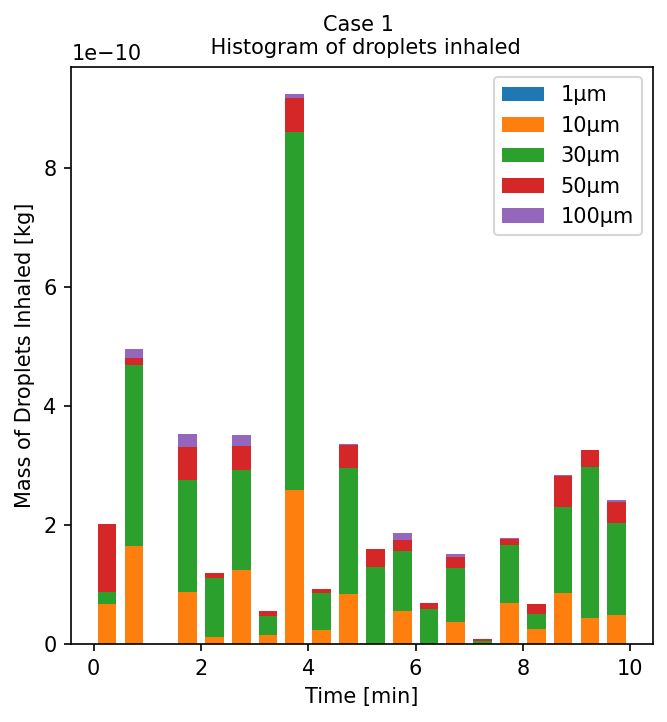

In [8]:
colors = ['red','green','blue']
label = [str(int(i*1e6)) + 'µm' for i in diamarray]

fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
plt.hist([dia1,dia2,dia3,dia4,dia5], bins=20,stacked=True, rwidth=0.7, label=label, weights=[weight1,weight2,weight3,weight4,weight5])
plt.legend()
plt.xlabel('Time [min]')
plt.ylabel('Mass of Droplets Inhaled [kg]')
# plt.ylabel('Number of Droplets Inhaled [-]')
plt.title('Case 1 \n Histogram of droplets inhaled',fontsize=10)
# plt.savefig('../../Case7/Virions Inhaled Sampling/hist1.jpg')

(array([6.74682155e-11, 1.64378809e-10, 0.00000000e+00, 8.75279129e-11,
        1.15874503e-11, 1.24971299e-10, 1.45462023e-11, 2.57581067e-10,
        2.44510156e-11, 8.32924177e-11, 6.28318531e-16, 5.57789776e-11,
        1.24407069e-13, 3.71022092e-11, 0.00000000e+00, 6.90578614e-11,
        2.53023872e-11, 8.58094617e-11, 4.37692972e-11, 4.82818809e-11]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

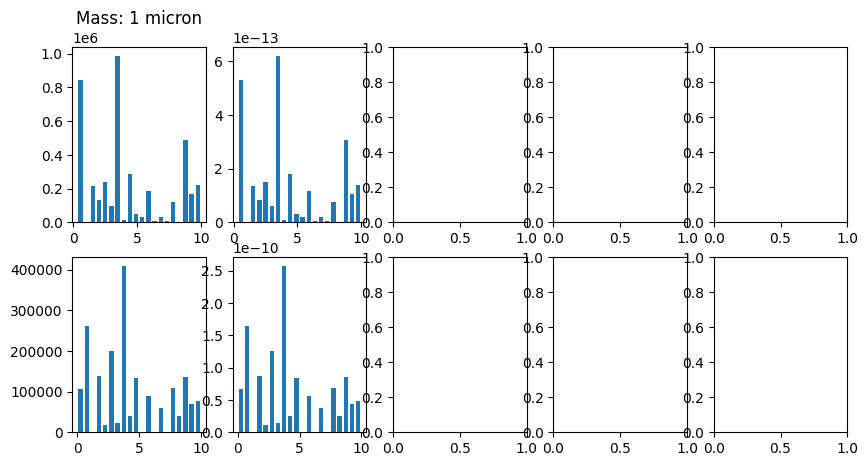

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=5,figsize = (15,5))

axs[0,0].hist(dia1, bins=20, rwidth=0.7)
axs[0,0].set_title('Numbers: 1 micron')

axs[1,0].hist(dia1, bins=20, rwidth=0.7, weights=weight1)
axs[1,0].set_title('Mass: 1 micron')

axs[0,1].hist(dia2, bins=20, rwidth=0.7)
axs[0,1].set_title('Numbers: 10 micron')

axs[1,1].hist(dia2, bins=20, rwidth=0.7, weights=weight2)
axs[1,1].set_title('Mass: 10 micron')

axs[0,2].hist(dia3, bins=20, rwidth=0.7)
axs[0,2].set_title('Numbers: 30 micron')

axs[1,2].hist(dia3, bins=20, rwidth=0.7, weights=weight3)
axs[1,2].set_title('Mass: 30 micron')

axs[0,3].hist(dia4, bins=20, rwidth=0.7)
axs[0,3].set_title('Numbers: 50 micron')

axs[1,3].hist(dia4, bins=20, rwidth=0.7, weights=weight4)
axs[1,3].set_title('Mass: 50 micron')

axs[0,4].hist(dia5, bins=20, rwidth=0.7)
axs[0,4].set_title('Numbers: 100 micron')

axs[1,4].hist(dia5, bins=20, rwidth=0.7, weights=weight5)
axs[1,4].set_title('Mass: 100 micron')



In [4]:
file = open(filename_left,'r')
count = 0
index = 0

# labelvars=[]
# indexvars=[]
timearray=[]
diamarray=[3e-05, 5e-05, 1e-05, 1e-06, 0.0001, 3e-6]
diamlist = []
twocollist = []
# time1 = []
# time2 = []
# time3 = []
# time4 = []
# time5 = []
# time6 = []

for lines in file:
  # if count==1: 
  #   labelvars = lines.split()[1:]

  count+=1

  if count>2: 

    twocollist.append([index,float(lines.split()[7]),float(lines.split()[13][:-1])])
    index+=1

    # diamlist.append(float(lines.split()[7]))
    # timearray.append(float(lines.split()[13][:-1]))
    # indexvars.append(count-2)

    # if float(lines.split()[7]) == diamarray[0]:
    #   time1.append(float(lines.split()[13][:-1]))

    # if float(lines.split()[7]) == diamarray[1]:
    #   time2.append(float(lines.split()[13][:-1]))

    # if float(lines.split()[7]) == diamarray[2]:
    #   time3.append(float(lines.split()[13][:-1]))

    # if float(lines.split()[7]) == diamarray[3]:
    #   time4.append(float(lines.split()[13][:-1]))

    # if float(lines.split()[7]) == diamarray[4]:
    #   time5.append(float(lines.split()[13][:-1]))

    # if float(lines.split()[7]) == diamarray[5]:
    #   time6.append(float(lines.split()[13][:-1]))

# print(count)
# print(lines)
file.close()

del file, count, lines

# print(totalarray[1][1:])
# totalarray = totalarray[2:]
# totalarray = np.array(totalarray)[:,1:-1]

# for i in range(len(totalarray)):
#   totalarray[i,-1] = totalarray[i,-1][:-1]

# totalarray = totalarray.astype(float)

In [6]:
twocollist = np.array(twocollist)

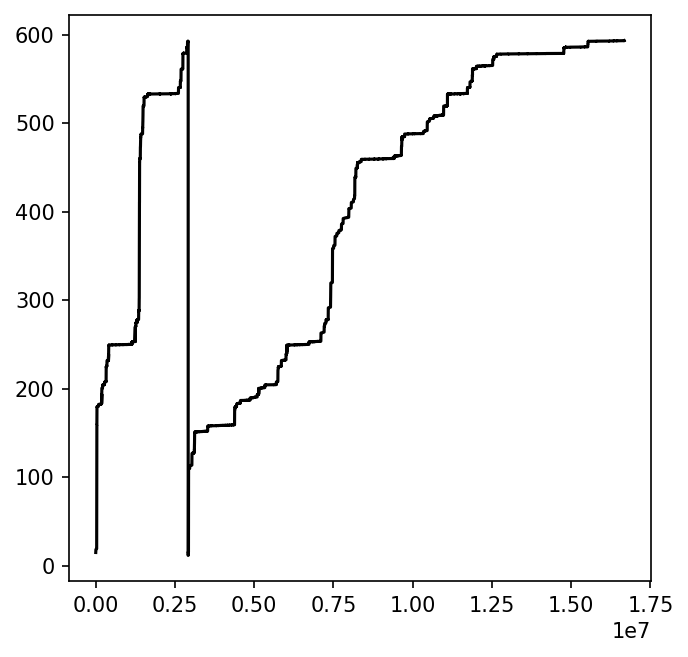

In [7]:
fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(twocollist[:,0],twocollist[:,2],'k',label='all')

In [7]:
twocollist = twocollist[twocollist[:, 2].argsort()]

In [8]:
for i in range(len(twocollist)):
    twocollist[i,0] = i

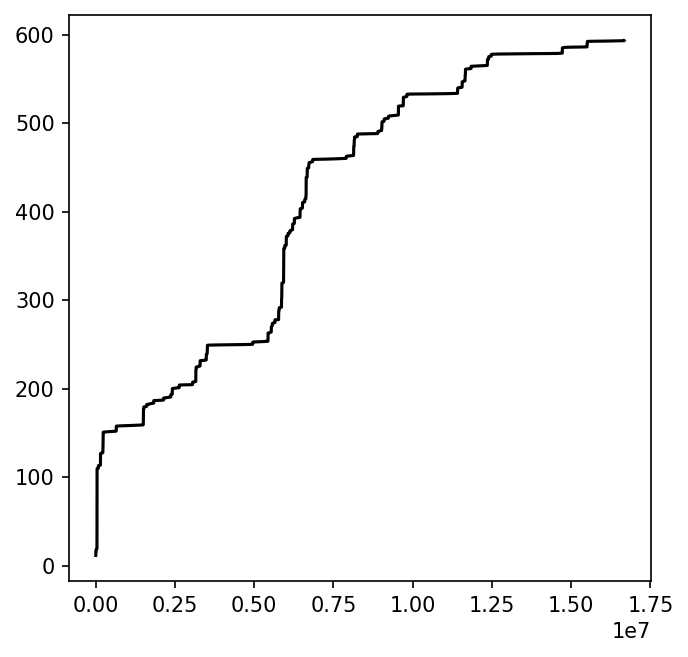

In [9]:
fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(twocollist[:,0],twocollist[:,2],'k',label='all')

In [10]:
diamlist = twocollist[:,1]
time = twocollist[:,2]

In [11]:
# diamlist = []
# for dia in diamarray:
#     if not dia in diamlist:
#         diamlist.append(dia)

# print(diamlist)

volumelist = np.pi/6*np.power(diamlist,3)
print(volumelist)


[1.41371669e-14 1.41371669e-14 1.41371669e-14 ... 5.23598776e-19
 5.23598776e-19 5.23598776e-19]


In [12]:
# time = np.array(timearray)
time = np.insert(time,0,0)
time = time/60

volumelist = np.insert(volumelist,0,0)

# time1 = np.array(time1)
# time1 = np.insert(time1,0,0)
# time1 = time1/60

# time2 = np.array(time2)
# time2 = np.insert(time2,0,0)
# time2 = time2/60

# time3 = np.array(time3)
# time3 = np.insert(time3,0,0)
# time3 = time3/60

# time4 = np.array(time4)
# time4 = np.insert(time4,0,0)
# time4 = time4/60

# time5 = np.array(time5)
# time5 = np.insert(time5,0,0)
# time5 = time5/60

# time6 = np.array(time6)
# time6 = np.insert(time6,0,0)
# time6 = time6/60

counts = []
# count1 = []
# count2 = []
# count3 = []
# count4 = []
# count5 = []

val = 0
sum = 0
for i in range(len(time)):
  sum+=volumelist[i]
  counts.append(sum)
  val+=1

# val = 0
# for i in range(len(time1)):
#   count1.append(val)
#   val+=1

# val = 0
# for i in range(len(time2)):
#   count2.append(val)
#   val+=1

# val = 0
# for i in range(len(time3)):
#   count3.append(val)
#   val+=1

# val = 0
# for i in range(len(time4)):
#   count4.append(val)
#   val+=1

# val = 0
# for i in range(len(time5)):
#   count5.append(val)
#   val+=1

# np.savetxt('../Case 0/Virions Inhaled Sampling/vals_left.csv',counts)
# np.savetxt('../Case 0/Virions Inhaled Sampling/time_left.csv',time)

In [13]:
cv = 7000000000 #billion/liter
cv = cv/1000 #in m3

N = cv*np.array(counts)
# N1 = cv*np.array(count1)
# N2 = cv*np.array(count2)
# N3 = cv*np.array(count3)
# N4 = cv*np.array(count4)
# N5 = cv*np.array(count5)


In [14]:
d = N/16000
# d1 = N1/16000
# d2 = N2/16000
# d3 = N3/16000
# d4 = N4/16000
# d5 = N5/16000

In [15]:
k = 410
power = -1/k * d
P = 1 - np.exp(power)

In [ ]:
xvals = np.linspace(0,10,num=101)

t = 0.1
dt = 0.1

for index,val in enumerate(time):

    if val>t:
        t += dt
        print(index,val)


In [ ]:
dt = 0.2
t = 0
index = 0
temp = t

plotx = []
ploty = []

plotx1 = []
ploty1 = []

plotx2 = []
ploty2 = []

plotx3 = []
ploty3 = []

plotx4 = []
ploty4 = []

plotx5 = []
ploty5 = []

while t<9.82:
    t = t + dt
    while time[index]<t:
        index+=1
    print(t,time[index],counts[index])
    plotx.append(time[index])
    ploty.append(counts[index])

In [ ]:
print(len(plotx))
print(ploty)

Text(0.5, 1.0, 'Case 0 - Both Nostrils')

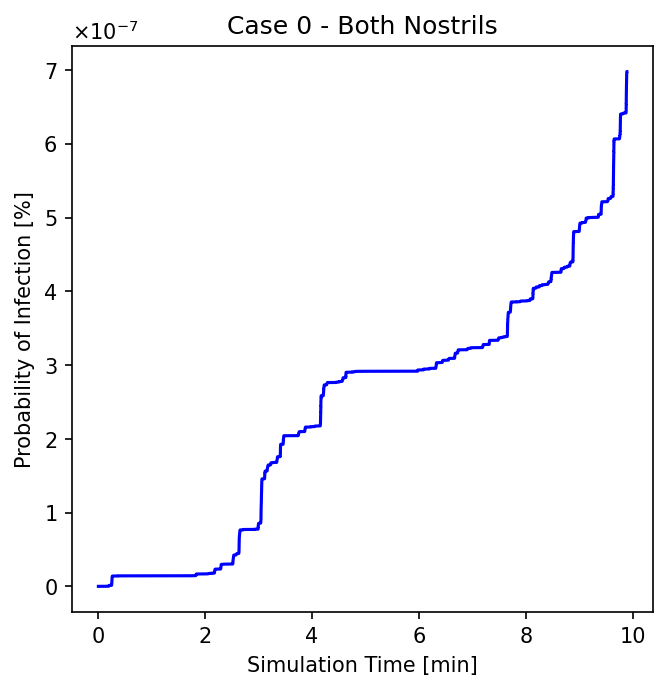

In [16]:
fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(time,P*100,'b',label='all')
# p4 = ax.plot(time4,count4,'r',label='1e-6')
# p3 = ax.plot(time3,count3,'g',label='1e-5')
# p1 = ax.plot(time1,count1,'b',label='3e-5')
# p2 = ax.plot(time2,count2,'y',label='5e-5')
# p5 = ax.plot(time5,count5,'c',label='1e-4')
# p = ax.semilogy(plotx,ploty,'b')
# plt.legend()
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Probability of Infection [%]')
plt.title('Case 0 - Both Nostrils')
# plt.savefig('../Case 0/Virions Inhaled Sampling/both.png')

# Export interpolated data to CSV

In [ ]:
if savecsv:
    header = 'X [m], Y [m], Z [m], Velocity [m/s], X-Velocity [m/s], Y-Velocity [m/s], Z-Velocity [m/s]'
    output = np.vstack((xcoord,ycoord,zcoord,x_vel,y_vel,z_vel,ttemp, dpm_c, probi)).T
    np.savetxt('output.csv',output,fmt='%.16e',delimiter=', ',newline='\n',header=header, comments='')

# Miscellaneous post-processing tools

### Minimum and maximum of variables
Used for visualisation purposes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable

dx = 0.1
datalocation = "../Case 0/Plane Output/"

m = 4.0 + 1e-10
n = 3.0 + 1e-10

xvmin = []
xvmax = []
yvmin = []
yvmax = []
zvmin = []
zvmax = []
temin = []
temax = []
dpmin = []
dpmax = []
pimin = []
pimax = []
vals = []

for i in range(0,601):

    j = i*10
    if i==0: j=1
    # j = i
    print('%d / %d' %(i,600))

    filename = datalocation + 'planeoutput-' + str(j).zfill(4)
    table = pd.read_csv(filename, delimiter=',')
    array = np.array(table)

    x = array[:,1]
    z = array[:,3]
    xvelocity = array[:,8]
    yvelocity = array[:,9]
    zvelocity = array[:,10]
    temperature = array[:,11]
    dpm_concentration = array[:,13]
    prob_infection = array[:,20]

    grid_x, grid_z = np.mgrid[dx/2:m-dx/2:dx, dx/2:n-dx/2:dx]

    grid_u = griddata((x, z), xvelocity, (grid_x, grid_z), method='cubic')
    grid_v = griddata((x, z), yvelocity, (grid_x, grid_z), method='cubic')
    grid_w = griddata((x, z), zvelocity, (grid_x, grid_z), method='cubic')
    grid_t = griddata((x, z), temperature, (grid_x, grid_z), method='cubic')
    grid_d = griddata((x, z), dpm_concentration, (grid_x, grid_z), method='cubic')
    grid_p = griddata((x, z), prob_infection, (grid_x, grid_z), method='cubic')

    grid_u[np.isnan(grid_u)] = 0
    grid_v[np.isnan(grid_v)] = 0
    grid_w[np.isnan(grid_w)] = 0
    grid_t[np.isnan(grid_t)] = 294
    grid_d[np.isnan(grid_d)] = 0
    grid_p[np.isnan(grid_p)] = 0

    grid_d.clip(min=0)
    grid_p.clip(min=0)

    xvmin.append(np.amin(grid_u))
    xvmax.append(np.amax(grid_u))

    yvmin.append(np.amin(grid_v))
    yvmax.append(np.amax(grid_v))

    zvmin.append(np.amin(grid_w))
    zvmax.append(np.amax(grid_w))

    temin.append(np.amin(grid_t))
    temax.append(np.amax(grid_t))

    dpmin.append(np.amin(grid_d))
    dpmax.append(np.amax(grid_d))

    pimin.append(np.amin(grid_p))
    pimax.append(np.amax(grid_p))

    vals.append(i)

In [ ]:
x1mean = -0.2 #np.mean(xvmin)*1.5
x2mean = 0.2 #np.mean(xvmax)*1.5
y1mean = -0.16 #np.mean(yvmin)*1.25
y2mean = 0.385 #np.mean(yvmax)*1.25
z1mean = np.mean(zvmin)*1.5 #-0.1,0.5 alternating
z2mean = np.mean(zvmax)*1.5
t1mean = 294 #np.mean(temin)
t2mean = 297.25 #np.mean(temax)
d1mean = 0 #np.mean(dpmin)*1.5
d2mean = 7.5e-7 #np.mean(dpmax)*1.5
p1mean = 0 #np.mean(pimin)*1.5
p2mean = 5 #np.mean(pimax)*1.5


fig,ax = plt.subplots(figsize=(6,3),dpi=150)
# ax.scatter(vals,xvmin,c='r')
# ax.scatter(vals,xvmax,c='b')
# ax.scatter(vals,yvmin,c='r')
# ax.scatter(vals,yvmax,c='b')
ax.scatter(vals,zvmin,c='r')
ax.scatter(vals,zvmax,c='b')
# ax.scatter(vals,temin,c='r')
# ax.scatter(vals,temax,c='b')
# ax.scatter(vals,np.abs(dpmin),c='r')
# ax.scatter(vals,dpmax,c='b')
# ax.scatter(vals,pimin,c='r')
# ax.scatter(vals,pimax,c='b')

# ax.plot([0,600],[x1mean,x1mean])
# ax.plot([0,600],[x2mean,x2mean])
# ax.plot([0,600],[y1mean,y1mean])
# ax.plot([0,600],[y2mean,y2mean])
ax.plot([0,600],[z1mean,z1mean])
ax.plot([0,600],[z2mean,z2mean])
# ax.plot([0,600],[t1mean,t1mean])
# ax.plot([0,600],[t2mean,t2mean])
# ax.plot([0,600],[d1mean,d1mean])
# ax.plot([0,600],[d2mean,d2mean])
# ax.plot([0,600],[p1mean,p1mean])
# ax.plot([0,600],[p2mean,p2mean])
